# Support Vector Machine (SVM)
Integrantes:
- Adrian Fulladolsa - 21592
- Jimena Hernández - 21199
- Emilio Solano - 21212
- Diego Hernández - 21270
- Linda Jimenez - 21169
- Javier Alvarado - 21188

## Importar las librerías

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score


## Importar el conjunto de datos

In [21]:
# Cargar datos del archivo covtype.data
df = pd.read_csv("covtype.data", header=None)

max_samples = 10000
print(df.info())

df = df.head(max_samples)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       581012 non-null  int64
 1   1       581012 non-null  int64
 2   2       581012 non-null  int64
 3   3       581012 non-null  int64
 4   4       581012 non-null  int64
 5   5       581012 non-null  int64
 6   6       581012 non-null  int64
 7   7       581012 non-null  int64
 8   8       581012 non-null  int64
 9   9       581012 non-null  int64
 10  10      581012 non-null  int64
 11  11      581012 non-null  int64
 12  12      581012 non-null  int64
 13  13      581012 non-null  int64
 14  14      581012 non-null  int64
 15  15      581012 non-null  int64
 16  16      581012 non-null  int64
 17  17      581012 non-null  int64
 18  18      581012 non-null  int64
 19  19      581012 non-null  int64
 20  20      581012 non-null  int64
 21  21      581012 non-null  int64
 22  22      581012 non-n

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2845,77,15,201,86,1507,238,212,101,1451,...,0,1,0,0,0,0,0,0,0,5
9996,2828,74,18,150,68,1556,239,203,89,1460,...,0,1,0,0,0,0,0,0,0,5
9997,3245,309,16,150,57,150,173,227,194,1557,...,0,0,0,0,0,0,0,0,0,1
9998,3245,33,12,335,46,430,218,214,131,1298,...,0,0,0,0,0,0,0,0,0,1


# Dividivir la variable respuesta del conjunto de datos

In [22]:
X = df.iloc[:, :-1].values  # Todas las filas, todas las columnas excepto la última
y = df.iloc[:, -1].values  # Todas las filas, última columna

## Dividir el conjunto de datos en un conjunto para entrenar y otro para pruebas

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd 

# Almacenar las metricas de efectividad de cada modelo
results = {}
def evaluar_svm(num_muestras):
    X_subset, y_subset = X[:num_muestras], y[:num_muestras]

    X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X_subset, y_subset, test_size=0.25, random_state=42)
    
    normalizador = StandardScaler()
    X_entreno = normalizador.fit_transform(X_entreno)
    X_prueba = normalizador.transform(X_prueba)

    clasificador = SVC(kernel='linear', random_state=42)
    inicio = time.time()
    clasificador.fit(X_entreno, y_entreno)
    fin = time.time()
    y_pred = clasificador.predict(X_prueba)
    
    mat_conf = confusion_matrix(y_prueba, y_pred)
    accuracy = accuracy_score(y_prueba, y_pred)
    tiempo_ejecucion = fin - inicio

    results[num_muestras] = { 
        'accuracyScore': accuracy,
        'executionTime': tiempo_ejecucion
    }
    
    return tiempo_ejecucion

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


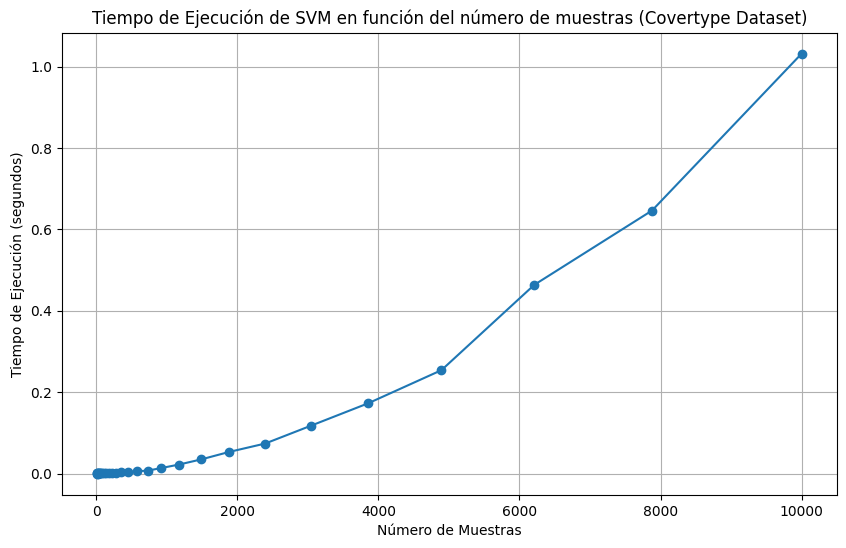

no. 10 : accuracy = 0.6666666666666666, tiempo = 0.0010204315185546875
no. 13 : accuracy = 1.0, tiempo = 0.0
no. 16 : accuracy = 0.75, tiempo = 0.0010006427764892578
no. 20 : accuracy = 1.0, tiempo = 0.0
no. 26 : accuracy = 0.8571428571428571, tiempo = 0.0010080337524414062
no. 33 : accuracy = 0.8888888888888888, tiempo = 0.0009996891021728516
no. 42 : accuracy = 1.0, tiempo = 0.001001596450805664
no. 53 : accuracy = 0.6428571428571429, tiempo = 0.0015060901641845703
no. 67 : accuracy = 0.7647058823529411, tiempo = 0.001007080078125
no. 85 : accuracy = 0.8636363636363636, tiempo = 0.0010020732879638672
no. 108 : accuracy = 0.8888888888888888, tiempo = 0.0009961128234863281
no. 137 : accuracy = 0.7714285714285715, tiempo = 0.0010008811950683594
no. 174 : accuracy = 0.7727272727272727, tiempo = 0.0010001659393310547
no. 221 : accuracy = 0.75, tiempo = 0.0026793479919433594
no. 281 : accuracy = 0.8169014084507042, tiempo = 0.001961946487426758
no. 356 : accuracy = 0.7865168539325843, tiem

In [40]:
# Generar 30 tamaños de muestra de manera progresiva hasta el límite de max_samples
tamanos_muestras = np.unique(np.round(np.logspace(1, np.log10(max_samples), 30)).astype(int))
tiempos_ejecucion = [evaluar_svm(n) for n in tamanos_muestras]

# Crear y mostrar la gráfica
plt.figure(figsize=(10, 6))
plt.plot(tamanos_muestras, tiempos_ejecucion, marker='o', linestyle='-')
plt.title('Tiempo de Ejecución de SVM en función del número de muestras (Covertype Dataset)')
plt.xlabel('Número de Muestras')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.grid(True)
plt.show()


for key, value in results.items():
    print(f"no. {key} : accuracy = {value['accuracyScore']}, tiempo = {value['executionTime']}")
